In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
print ("Number of rows in the dataset  : " ,df.shape[0])
print ("Number of Columns in the dataset : " ,df.shape[1])
print ("Missing values :  ", df.isnull().sum().sum())
print ("Unique values :  \n",df.nunique())

Number of rows in the dataset  :  7043
Number of Columns in the dataset :  21
Missing values :   0
Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [8]:
df.drop(['customerID'],axis=1,inplace=True)

In [9]:
df.duplicated().any()

True

In [10]:
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [11]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
#df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [14]:
df.loc[df['TotalCharges']==' ','TotalCharges'] = np.nan  

In [15]:
df[df['TotalCharges'].isnull() == True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
df.loc[df['TotalCharges'].isnull()==True,'TotalCharges'] = df['MonthlyCharges'] * df['tenure']

In [18]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [19]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [20]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
#df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [22]:
df.isnull().sum().sum()

0

# Feature engineering 

In [23]:
df['IsContracted'] = df.Contract.map({'One year':1,'Two year':1,'Month-to-month':0})

In [24]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,IsContracted
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,1
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0


# Check for Outliers

In [25]:
num_cols = ["tenure","MonthlyCharges","TotalCharges"]

def Outlier_boxplot(df, col):
    """ Display boxplot for given column """
    sns.boxplot(x=df[col])
    plt.show()

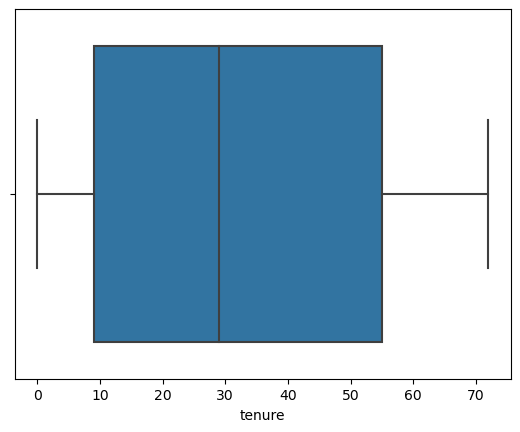

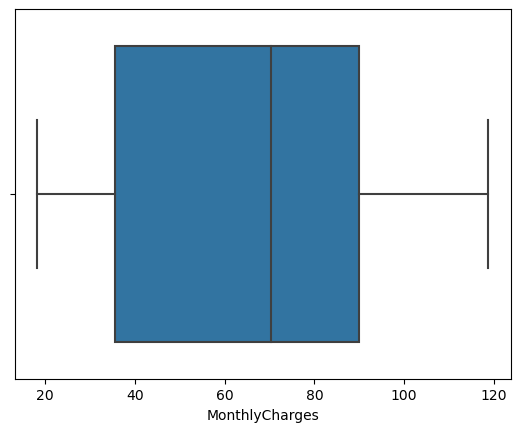

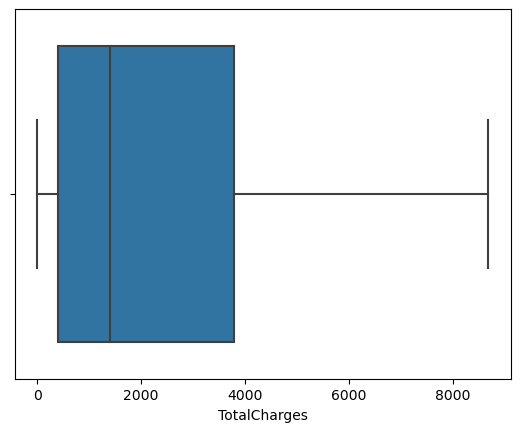

In [26]:
for i in num_cols:
    Outlier_boxplot(df,i)

# Customer Demographics

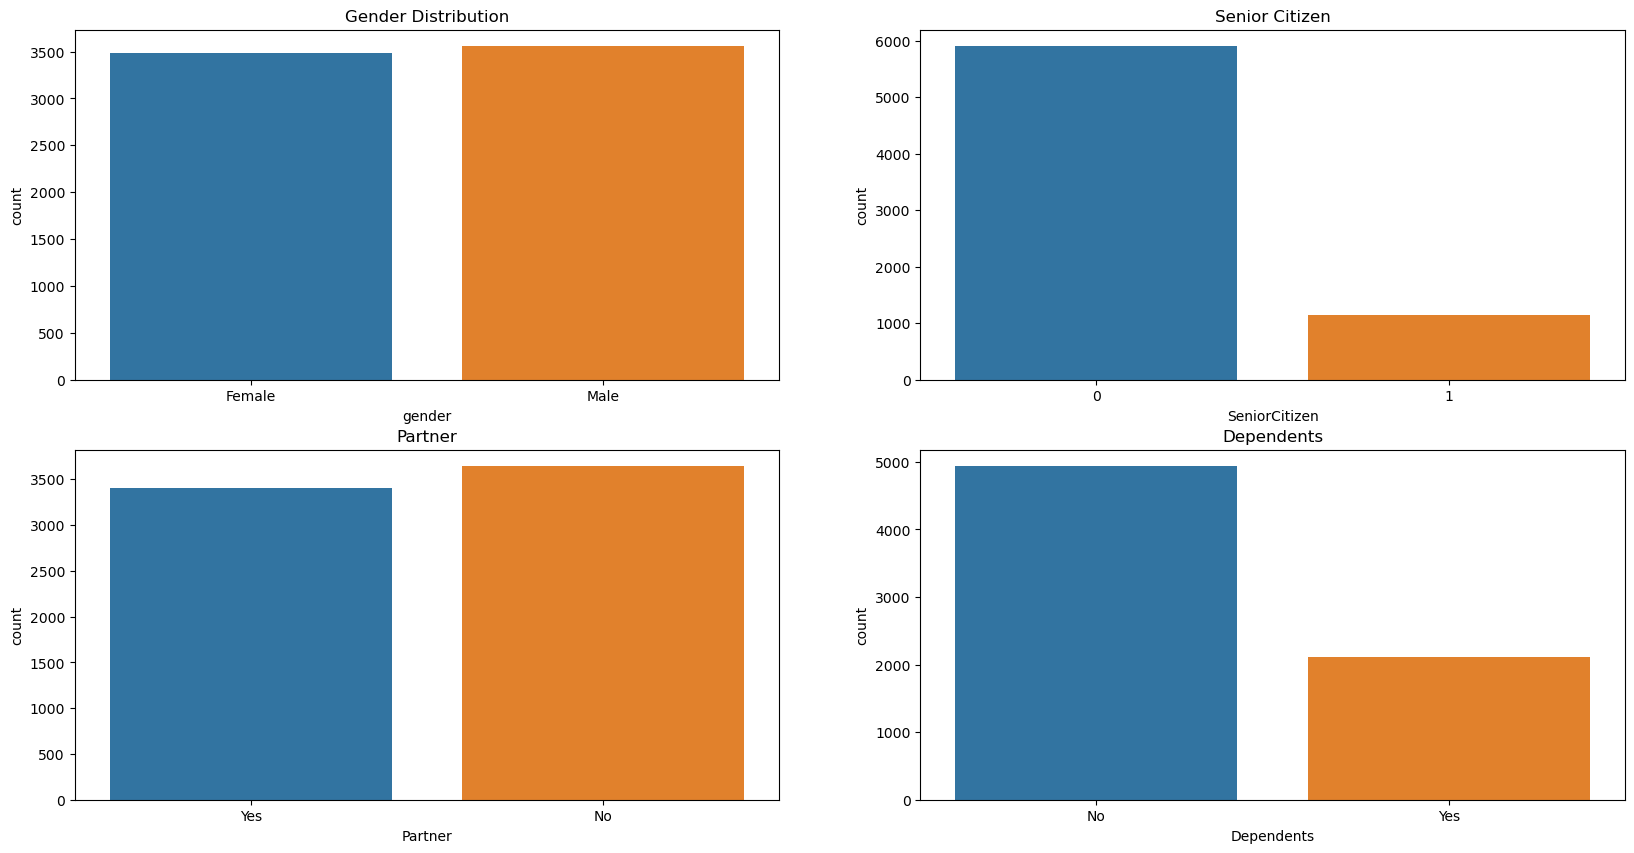

In [27]:
fig,ax = plt.subplots(2,2,figsize=(20,10))

sns.countplot(x=df['gender'],ax=ax[0,0]).set_title('Gender Distribution')

sns.countplot(x=df['SeniorCitizen'],data =df,ax=ax[0,1]).set_title('Senior Citizen')

sns.countplot(x=df['Partner'],ax=ax[1,0]).set_title('Partner')

sns.countplot(x =df['Dependents'], ax=ax[1,1]).set_title('Dependents')

plt.show()


# Services

Text(0.5, 1.0, 'Streaming Movies')

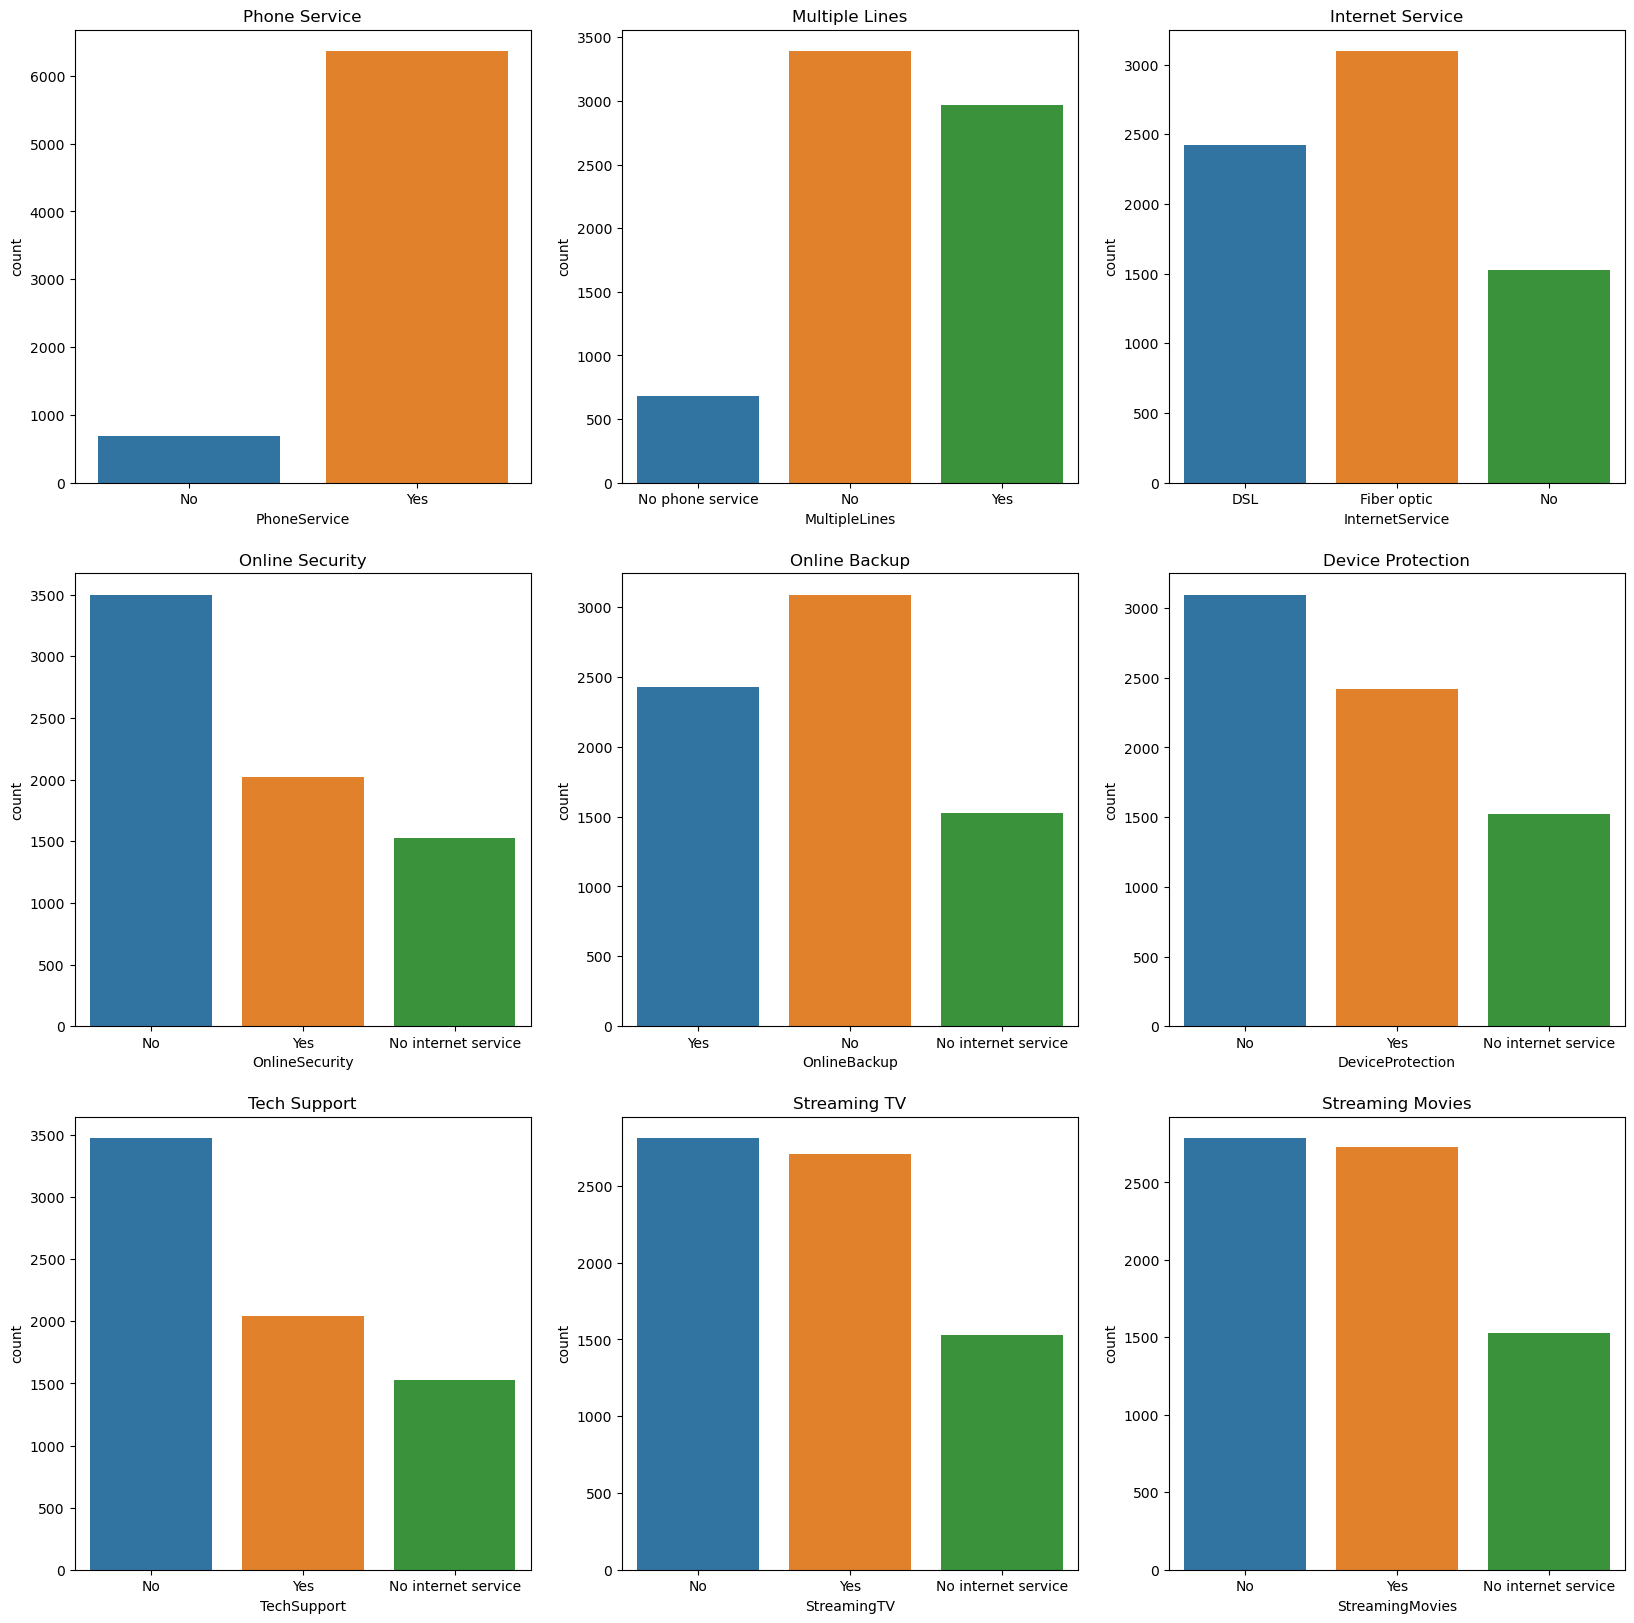

In [28]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
#phone service
sns.countplot(x = df['PhoneService'], ax=ax[0,0]).set_title('Phone Service')
#Multiple Lines
sns.countplot(x = df['MultipleLines'], ax=ax[0,1]).set_title('Multiple Lines')
#Internet Service
sns.countplot(x = df['InternetService'], ax=ax[0,2]).set_title('Internet Service')
#Online Security
sns.countplot(x = df['OnlineSecurity'], ax=ax[1,0]).set_title('Online Security')
#Online Backup
sns.countplot(x = df['OnlineBackup'], ax=ax[1,1]).set_title('Online Backup')
#Device Protection
sns.countplot(x = df['DeviceProtection'], ax=ax[1,2]).set_title('Device Protection')
#Tech Support
sns.countplot(x = df['TechSupport'], ax=ax[2,0]).set_title('Tech Support')
#Streaming TV
sns.countplot(x = df['StreamingTV'], ax=ax[2,1]).set_title('Streaming TV')
#Streaming Movies
sns.countplot(x = df['StreamingMovies'], ax=ax[2,2]).set_title('Streaming Movies')

# Tenure and Contract

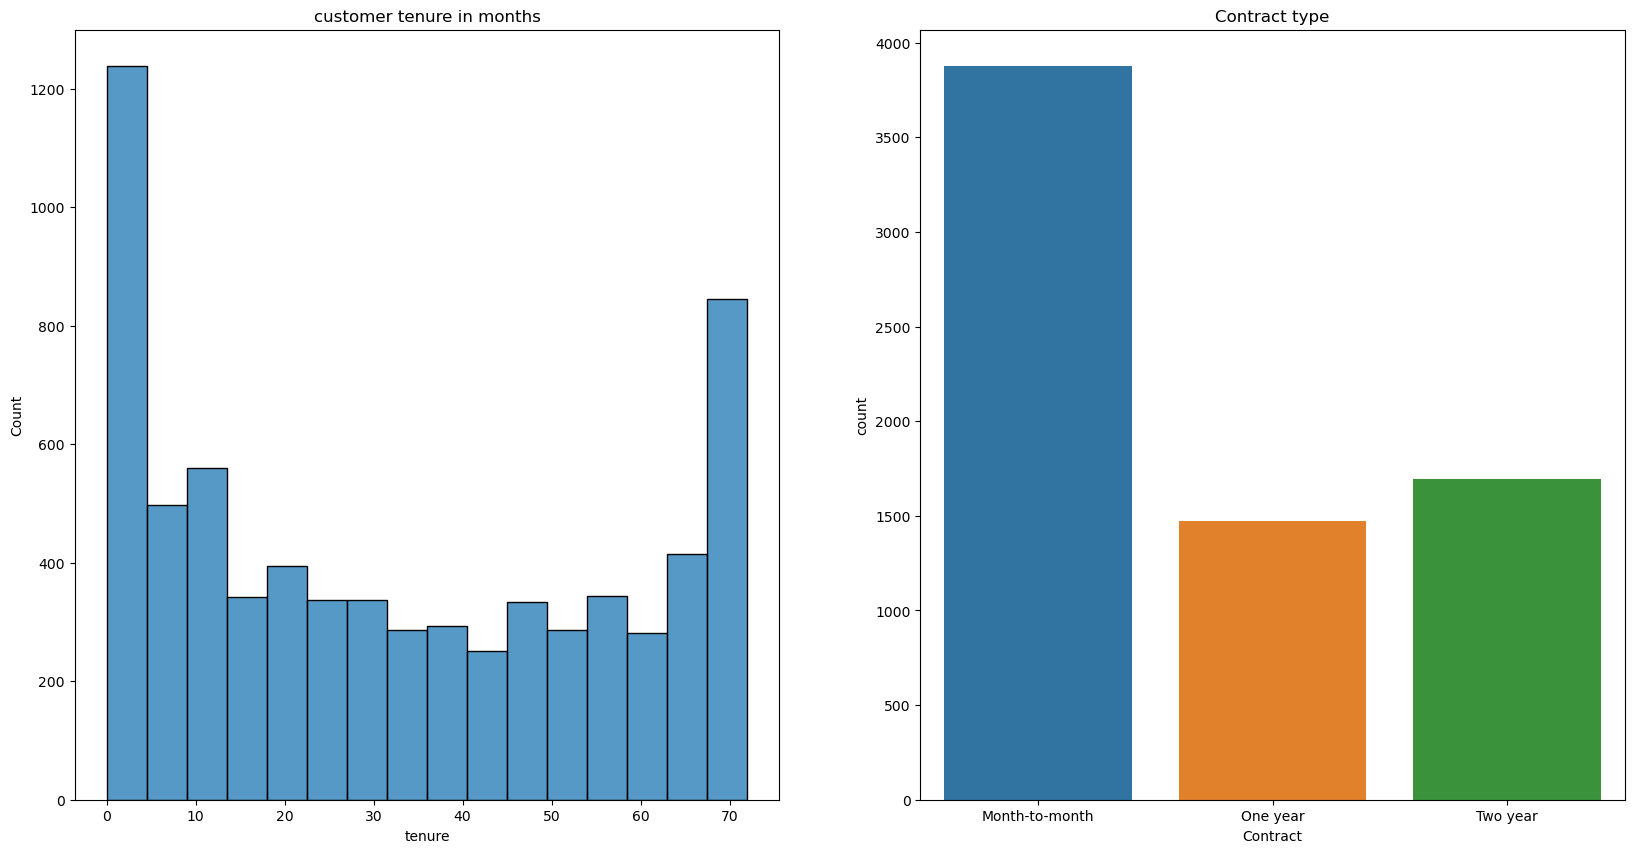

In [29]:
fig,ax =plt.subplots(nrows=1,ncols=2,figsize=(20,10))
sns.histplot(x='tenure',data=df,ax=ax[0]).set_title('customer tenure in months')
sns.countplot(x='Contract',data=df,ax=ax[1]).set_title('Contract type')
plt.show()

# Billing and Charges

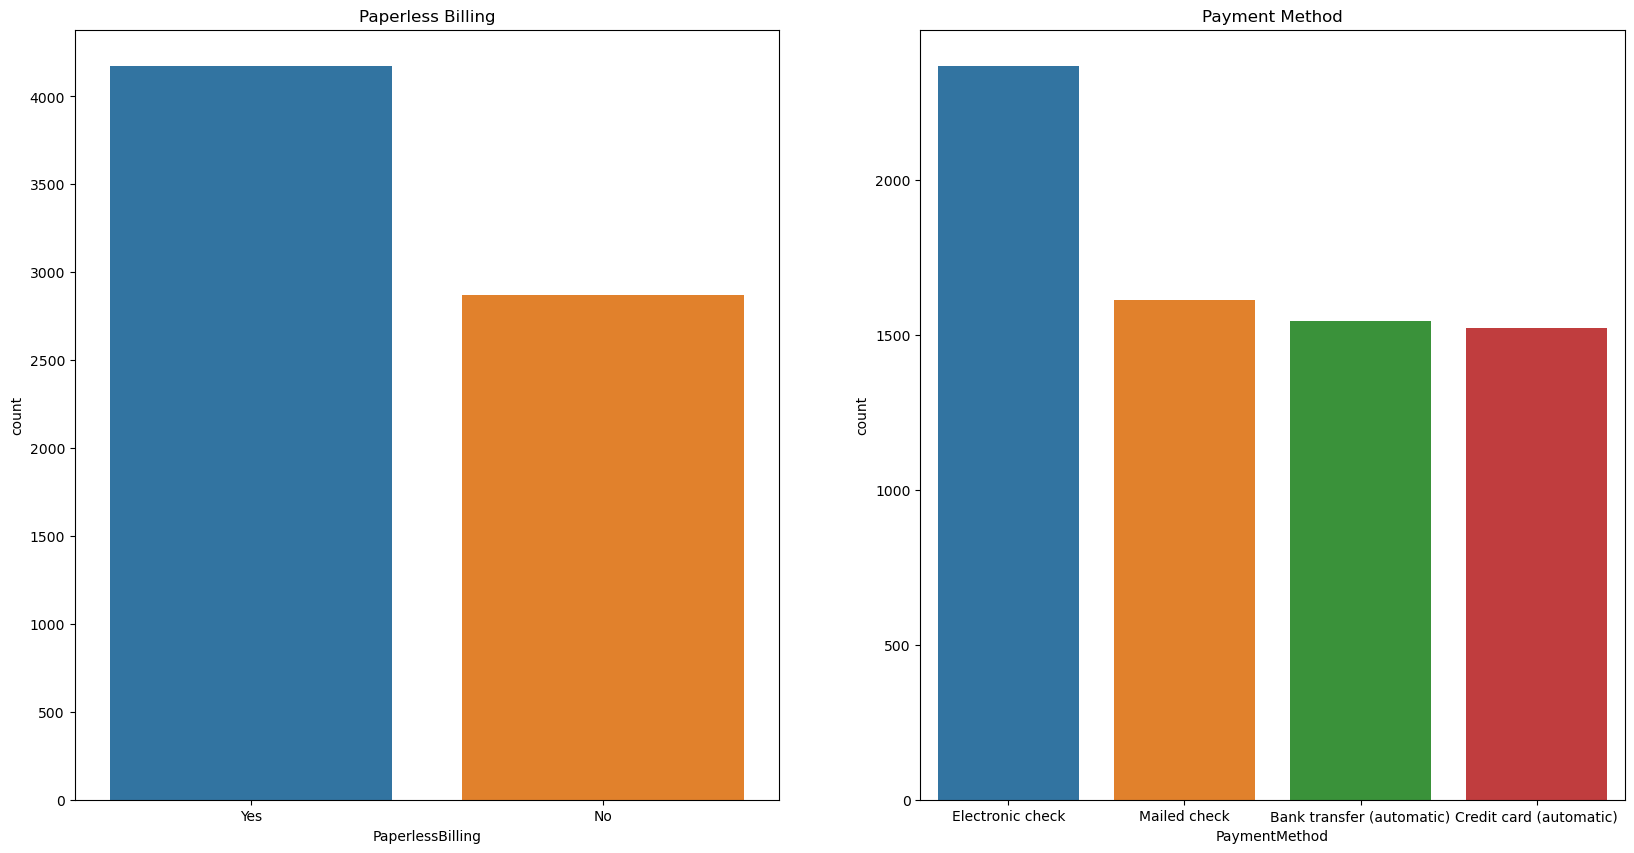

In [30]:
fig,axis=plt.subplots(1,2,figsize=(20,10))

sns.countplot(x='PaperlessBilling', data=df ,ax=axis[0]).set_title('Paperless Billing')
sns.countplot(x='PaymentMethod', data=df ,ax=axis[1]).set_title('Payment Method')
plt.show()

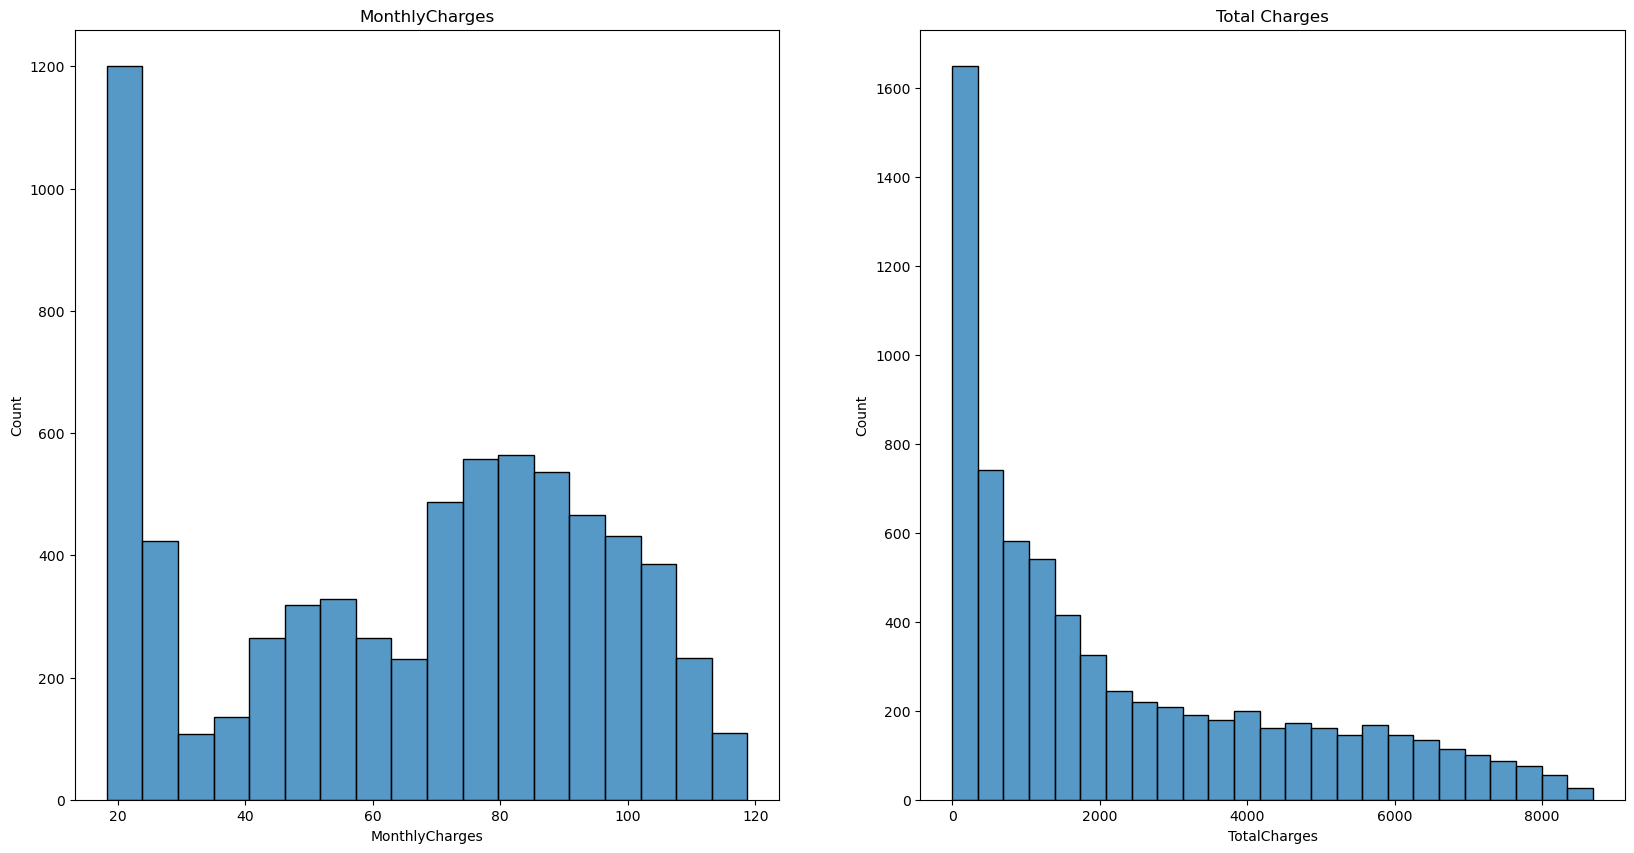

In [31]:
fig,axis=plt.subplots(1,2,figsize=(20,10))

sns.histplot(x='MonthlyCharges', data=df ,ax=axis[0]).set_title('MonthlyCharges')
sns.histplot(x='TotalCharges', data=df ,ax=axis[1]).set_title('Total Charges')
plt.show()

# Churn Count

In [32]:
#perentage of each class sample distribution
print("Customer Churn : {}%".format(np.round((len(df[df["Churn"]=="Yes"])/len(df)*100),decimals=2)))
print("Customer Not Churn : {}%".format(np.round((len(df[df["Churn"]=="No"])/len(df)*100),decimals=2)))

Customer Churn : 26.54%
Customer Not Churn : 73.46%


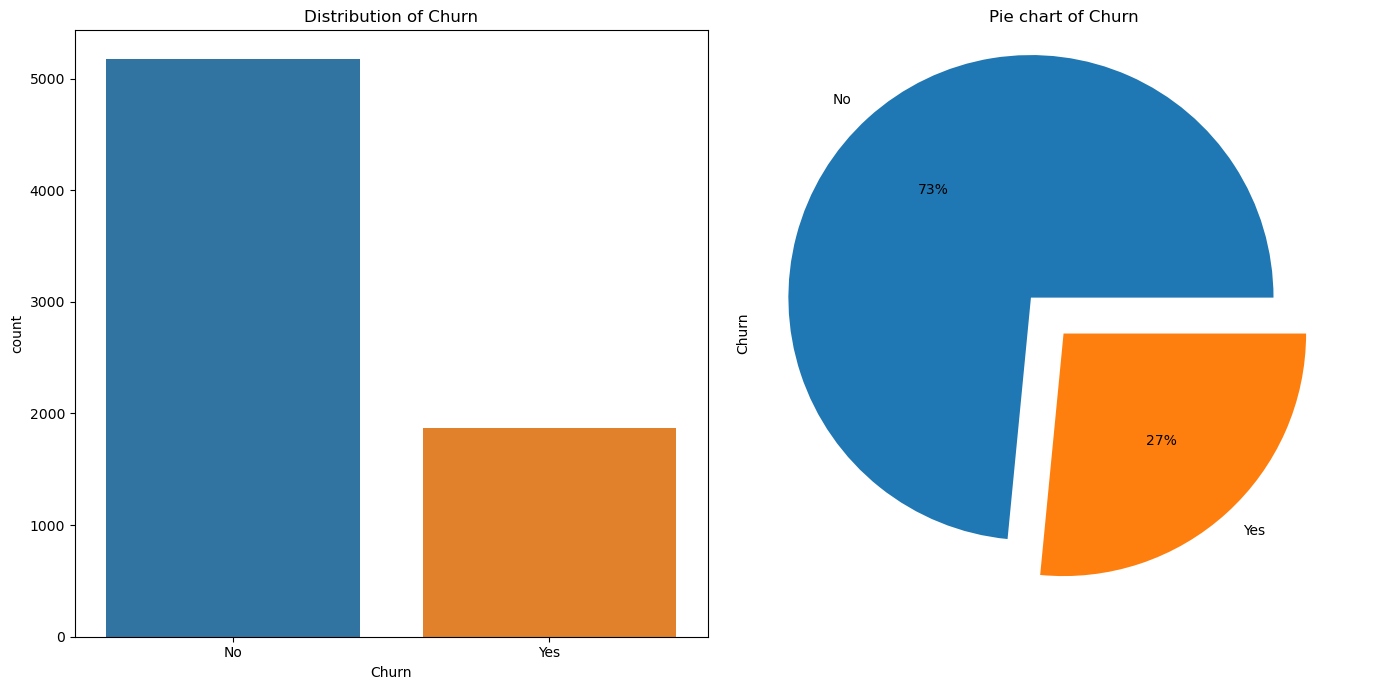

In [33]:
# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Count plot for Churn
sns.countplot(data=df, x="Churn", ax=ax[0]).set_title("Distribution of Churn")

# Pie chart for Churn
df['Churn'].value_counts().plot(kind='pie', autopct="%1.f%%", labels=['No', 'Yes'], explode=[0.2, 0], ax=ax[1]).set_title('Pie chart of Churn')

# Adjust layout
plt.tight_layout()
plt.show()
                   

Text(0.5, 1.0, 'Dependents and Churn')

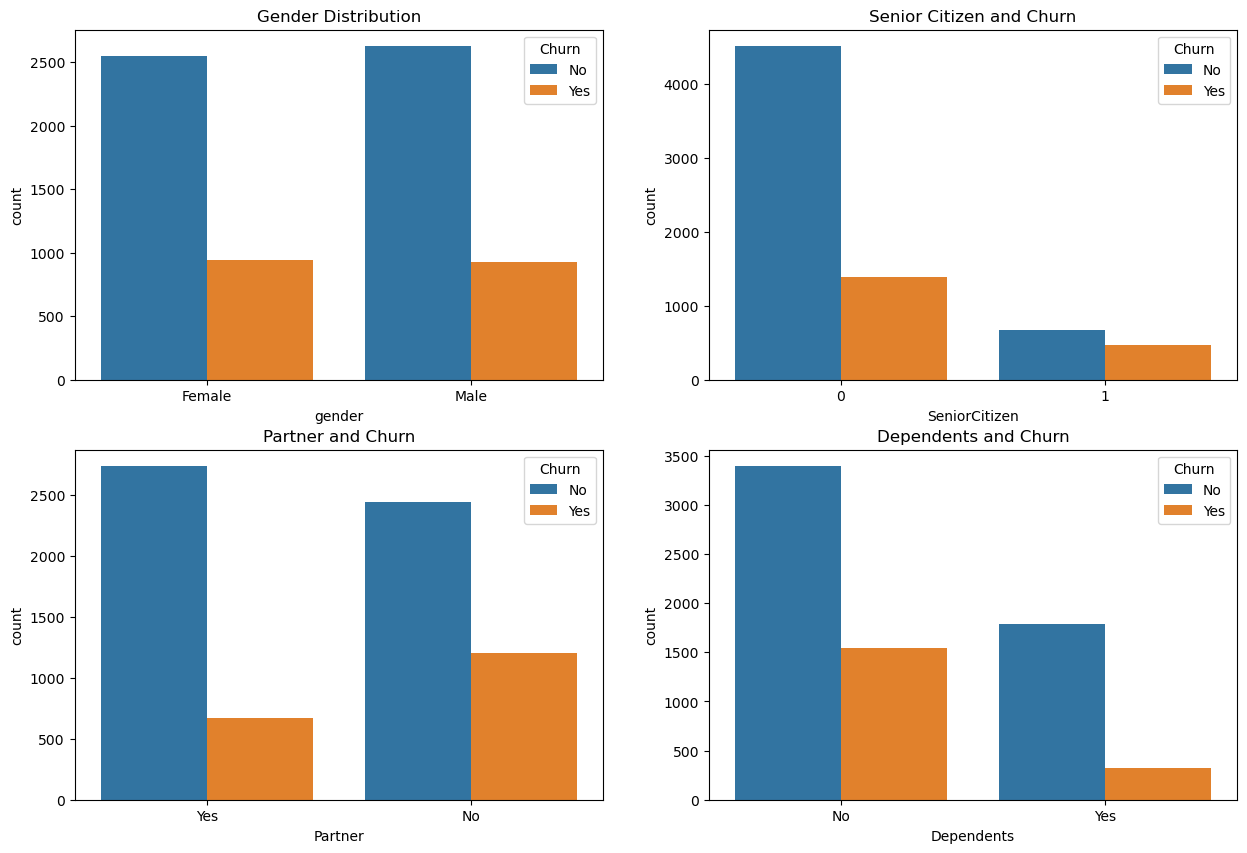

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

#Gender Distribution
sns.countplot(x = 'gender', data = df, hue = 'Churn', ax=ax[0,0])
ax[0,0].set_title('Gender Distribution')

#Senior Citizen Distribution
sns.countplot(x = df['SeniorCitizen'], ax=ax[0,1], hue = df['Churn']).set_title('Senior Citizen and Churn')

#Partner Distribution
sns.countplot( x = df['Partner'], ax=ax[1,0], hue = df['Churn']).set_title('Partner and Churn')

#Dependents Distribution
sns.countplot(x = df['Dependents'], ax=ax[1,1], hue = df['Churn']).set_title('Dependents and Churn')

Text(0.5, 1.0, 'Streaming Movies')

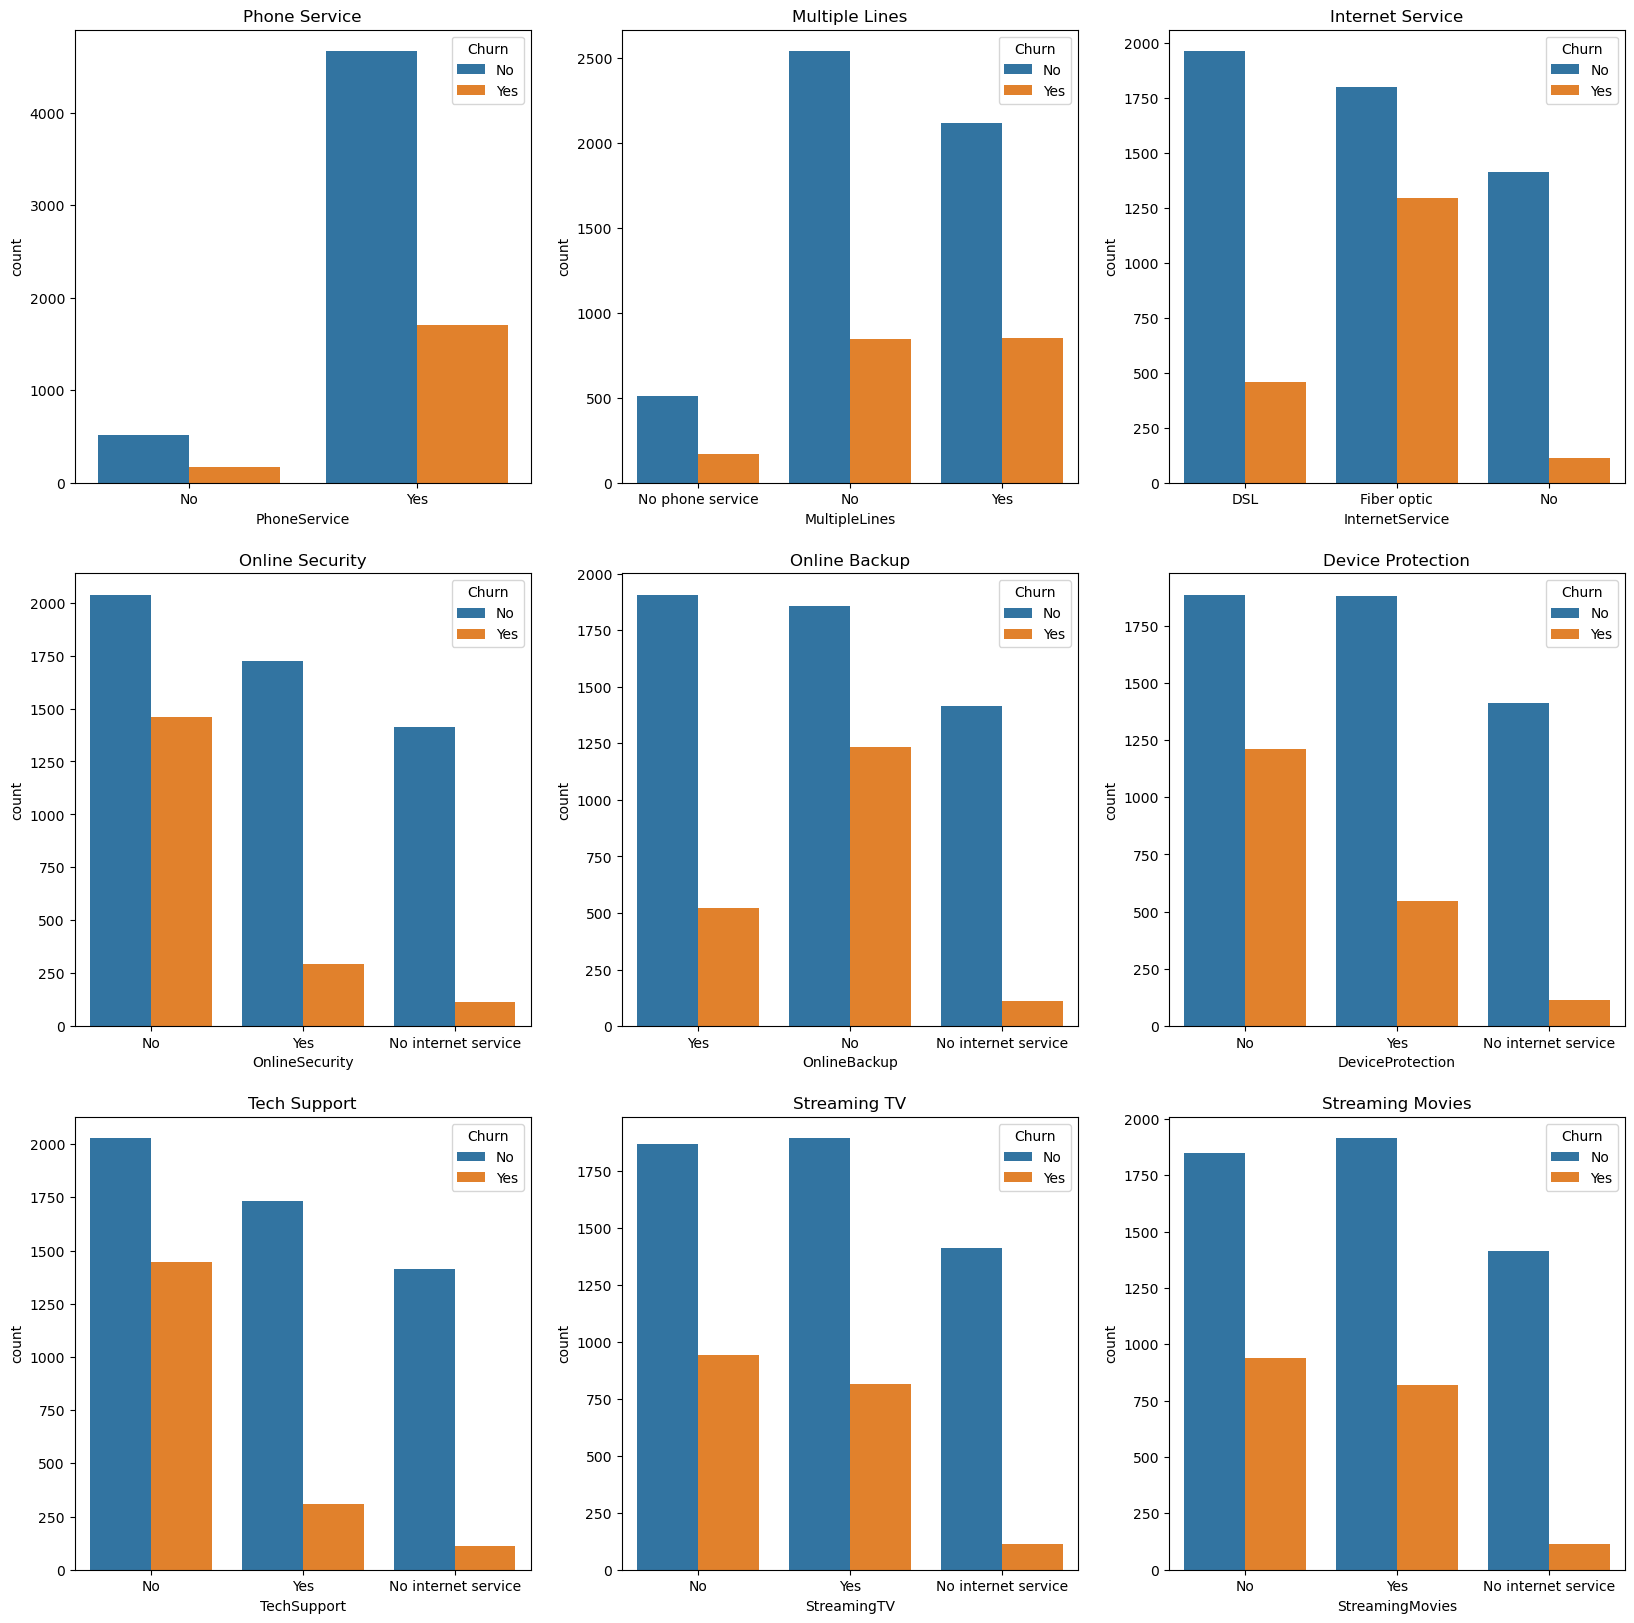

In [35]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
#phone service
sns.countplot(x = df['PhoneService'], ax=ax[0,0], hue = df['Churn']).set_title('Phone Service')
ax[0,0].set_title('Phone Service')
#Multiple Lines
sns.countplot(x = df['MultipleLines'], ax=ax[0,1], hue = df['Churn']).set_title('Multiple Lines')
ax[0,1].set_title('Multiple Lines')
#Internet Service
sns.countplot(x = df['InternetService'], ax=ax[0,2], hue = df['Churn']).set_title('Internet Service')
ax[0,2].set_title('Internet Service')
#Online Security
sns.countplot(x = df['OnlineSecurity'], ax=ax[1,0], hue = df['Churn']).set_title('Online Security')
ax[1,0].set_title('Online Security')
#Online Backup
sns.countplot(x = df['OnlineBackup'], ax=ax[1,1], hue = df['Churn']).set_title('Online Backup')
ax[1,1].set_title('Online Backup')
#Device Protection
sns.countplot(x = df['DeviceProtection'], ax=ax[1,2], hue = df['Churn']).set_title('Device Protection')
ax[1,2].set_title('Device Protection')
#Tech Support
sns.countplot(x = df['TechSupport'], ax=ax[2,0], hue = df['Churn']).set_title('Tech Support')
ax[2,0].set_title('Tech Support')
#Streaming TV
sns.countplot(x = df['StreamingTV'], ax=ax[2,1], hue = df['Churn']).set_title('Streaming TV')
ax[2,1].set_title('Streaming TV')
#Streaming Movies
sns.countplot(x = df['StreamingMovies'], ax=ax[2,2], hue = df['Churn']).set_title('Streaming Movies')
ax[2,2].set_title('Streaming Movies')

Text(0.5, 1.0, 'Contract Type and Churn')

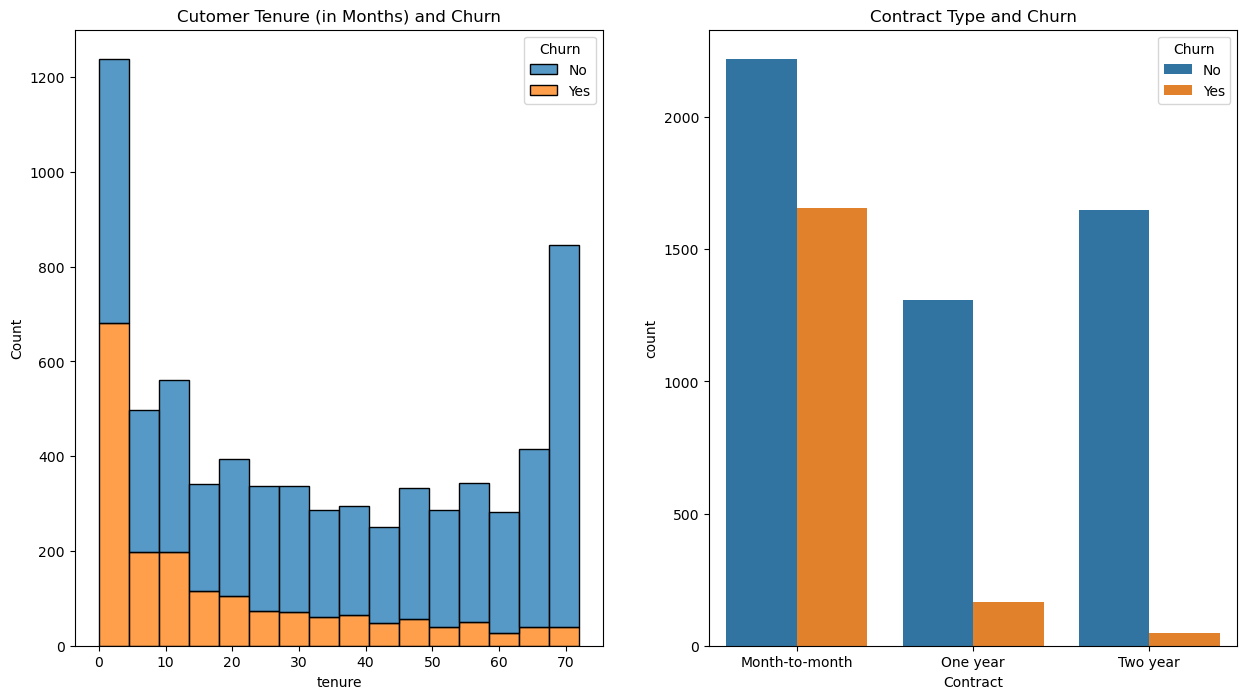

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.histplot(x = 'tenure', data = df, ax= ax[0], hue = 'Churn', multiple = 'stack').set_title('Cutomer Tenure (in Months) and Churn')
sns.countplot(x = 'Contract', data = df, ax= ax[1], hue = 'Churn').set_title('Contract Type and Churn')

# Billing/Charges and Churn

Text(0.5, 1.0, 'Total Charges')

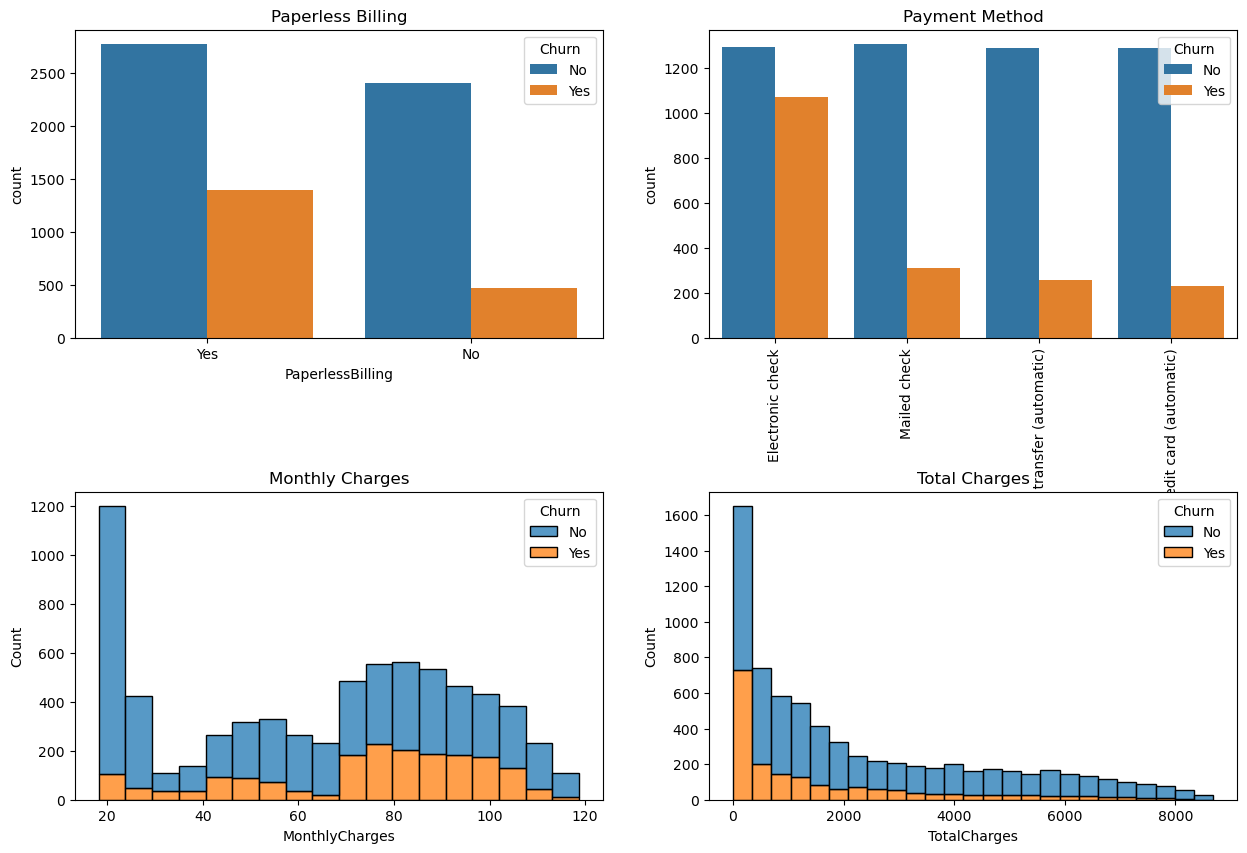

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
#fig.tight_layout(pad=5.0)

#spacing between subplots
fig.subplots_adjust(hspace=0.5)

 
#papaerless billing
sns.countplot(x = df['PaperlessBilling'], ax=ax[0,0], hue = df['Churn']).set_title('Paperless Billing')

#Payment Method
sns.countplot(x = df['PaymentMethod'], ax=ax[0,1], hue = df['Churn']).set_title('Payment Method')
ax[0,1].xaxis.set_tick_params(rotation=90)

#Monthly Charges
sns.histplot(x = 'MonthlyCharges', data = df, ax = ax[1,0], hue = 'Churn', multiple= 'stack').set_title('Monthly Charges')

#Total Charges
sns.histplot(x = 'TotalCharges', data = df, ax = ax[1,1], hue = 'Churn', multiple= 'stack').set_title('Total Charges')

In [38]:
'''
#plot cateogrical features :
cat_features=list(df.select_dtypes(include='object').columns)
cat_features.remove('Churn')
cat_features.append('SeniorCitizen')

fig,axs=plt.subplots(nrows=4,ncols=4,figsize=(20,15))
axes=axs.flatten()
for i,col in enumerate(cat_features):
    sns.countplot(x=col,hue="Churn",data=df,ax=axes[i])
#adjust spacing between subplots
fig.tight_layout()
plt.show()


'''


'\n#plot cateogrical features :\ncat_features=list(df.select_dtypes(include=\'object\').columns)\ncat_features.remove(\'Churn\')\ncat_features.append(\'SeniorCitizen\')\n\nfig,axs=plt.subplots(nrows=4,ncols=4,figsize=(20,15))\naxes=axs.flatten()\nfor i,col in enumerate(cat_features):\n    sns.countplot(x=col,hue="Churn",data=df,ax=axes[i])\n#adjust spacing between subplots\nfig.tight_layout()\nplt.show()\n\n\n'

In [39]:
#how much loss we are having because of customer churn
churn_customers=df[df["Churn"]=="Yes"]
loss=churn_customers["TotalCharges"].sum()
total_revenue=df["TotalCharges"].sum()
print("We have lost arround {}$ due to customer churn".format(loss))
print("We have lost arround {} percentage of revengue due to customer churn".format(np.round(loss/total_revenue*100,decimals=2)))

We have lost arround 2862926.9$ due to customer churn
We have lost arround 17.83 percentage of revengue due to customer churn


In [40]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,IsContracted
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,1
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0


In [41]:
df[df['Churn'] == 'No'].groupby('gender').size()

gender
Female    2549
Male      2625
dtype: int64

In [42]:
df[df['Churn'] == 'Yes'].groupby('gender').size()

gender
Female    939
Male      930
dtype: int64

In [43]:
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       993
Fiber optic      No       910
No               No       722
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
dtype: int64

In [44]:
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       969
Fiber optic      No       889
No               No       691
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
dtype: int64

In [45]:
df.groupby('Churn')[['tenure','MonthlyCharges','TotalCharges']].mean()

,tenure,MonthlyCharges,TotalCharges
Churn,,,
No,37.569965,61.265124,2549.911442
Yes,17.979133,74.441332,1531.796094


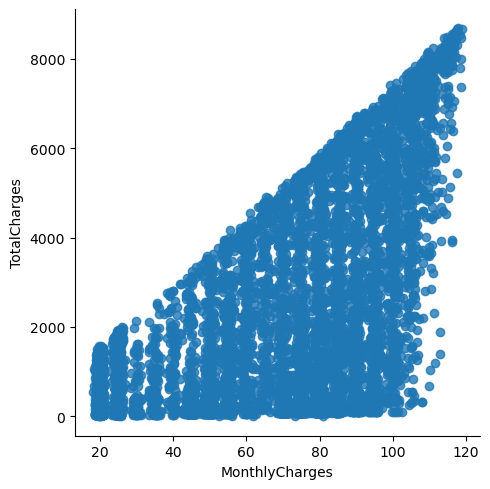

In [46]:
sns.lmplot(data=df, x='MonthlyCharges', y='TotalCharges', fit_reg=False)
plt.show()

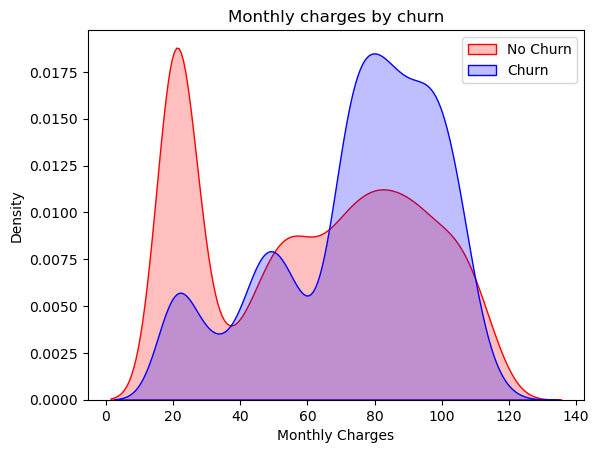

In [47]:
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                 color="Red", shade = True)
Mth = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =Mth, color="Blue",shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')
plt.show()

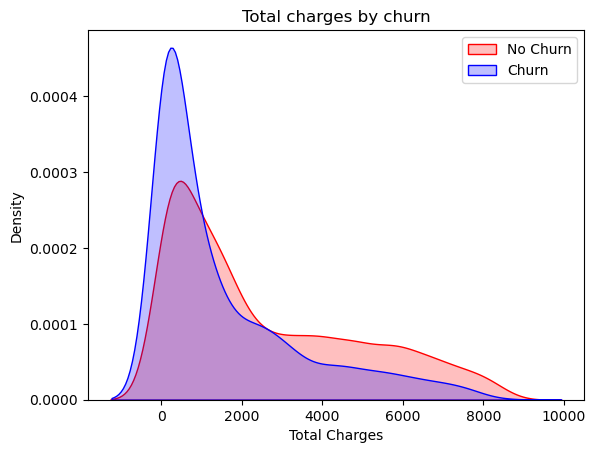

In [48]:
Tot = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')
plt.show ()

In [49]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,IsContracted
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,1
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0


# Data Preprocessing

In [50]:
df = pd.get_dummies(df,columns=['PaymentMethod', 'Contract', 'InternetService'], drop_first=True)

In [51]:
def changeColumnsToString(df):
    columnsNames=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
    for col in columnsNames:
        df[col]=df[col].astype('str').str.replace('Yes','1').replace('No','0').replace('No internet service','0').replace('No phone service',0)

changeColumnsToString(df)

In [52]:
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})


In [53]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,IsContracted,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,29.85,0,0,0,1,0,0,0,0,0
1,1,0,0,0,34,1,0,1,0,1,...,1889.50,0,1,0,0,1,1,0,0,0
2,1,0,0,0,2,1,0,1,1,0,...,108.15,1,0,0,0,1,0,0,0,0
3,1,0,0,0,45,0,0,1,0,1,...,1840.75,0,1,0,0,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,151.65,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1990.50,0,1,0,0,1,1,0,0,0
7039,0,0,1,1,72,1,1,0,1,1,...,7362.90,0,1,1,0,0,1,0,1,0
7040,0,0,1,1,11,0,0,1,0,0,...,346.45,0,0,0,1,0,0,0,0,0
7041,1,1,1,0,4,1,1,0,0,0,...,306.60,1,0,0,0,1,0,0,1,0


In [54]:
df.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                   object
Dependents                                object
tenure                                     int64
PhoneService                              object
MultipleLines                             object
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies                           object
PaperlessBilling                          object
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                     object
IsContracted                               int64
PaymentMethod_Credit card (automatic)      uint8
PaymentMethod_Electronic check             uint8
PaymentMethod_Mailed

In [55]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'IsContracted', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

In [56]:
df.columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'IsContracted', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No']

for i in df.columns:
    df[i]=pd.to_numeric(df[i],errors='coerce')

In [57]:
df.dtypes


gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
IsContracted                               int64
PaymentMethod_Credit card (automatic)      uint8
PaymentMethod_Electronic check             uint8
PaymentMethod_Mailed

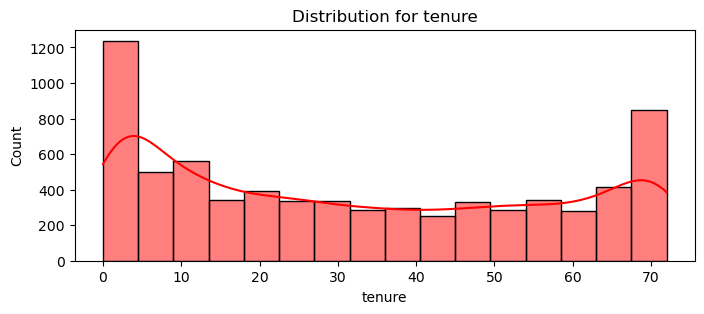

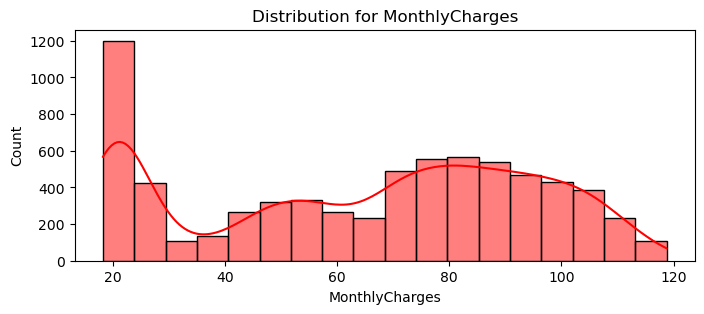

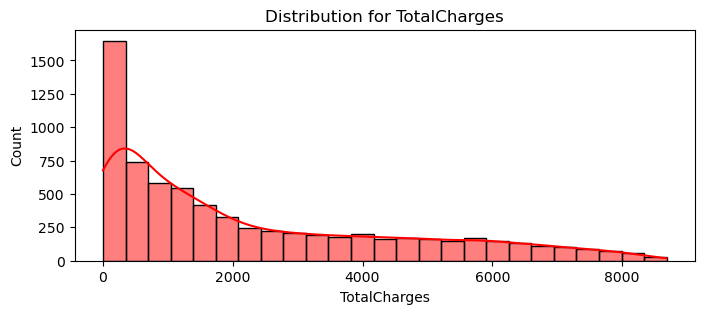

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8, 3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.histplot(frame[feature], color=color, kde=True)

col = ["tenure", 'MonthlyCharges', 'TotalCharges']
for features in col:
    distplot(features, df)

# Model 

In [59]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from imblearn.combine import SMOTEENN

In [60]:
X=df.drop('Churn',axis=1)
y=df['Churn']

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
#Feature Scalling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = sc.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [63]:
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = sc.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [65]:
def evaluate_model_performance(model,test_data):
    prediction=model.predict(test_data)
    print("Validation Accurary : {:.2f} %".format(accuracy_score(y_test,prediction)))
    print("Precision Score : {:.2f} %".format(precision_score(y_test,prediction)))
    print("Recall Score : {:.2f} %".format(recall_score(y_test,prediction)))
    print("F1 Score : {:.2f} %".format(f1_score(y_test,prediction)))
    print(classification_report(y_test,prediction))

# Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtree  = DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


In [67]:
dtree  = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=6, min_samples_split=2, random_state=0)

dtree.fit(X_train, y_train)

print('Training Accuracy: ', dtree.score(X_train, y_train))

d_pred = dtree.predict(X_test)


Training Accuracy:  0.789847355342563


# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='accuracy')

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


Fitting 3 folds for each of 500 candidates, totalling 1500 fits
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 0}


In [70]:
rfc = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_leaf=2, min_samples_split=6, random_state=0)

rfc.fit(X_train, y_train)

print('Training Accuracy: ', rfc.score(X_train, y_train))

r_pred = rfc.predict(X_test)


Training Accuracy:  0.854632587859425


In [71]:
from sklearn.metrics import classification_report

print('Decision Tree Classification Report: \n', classification_report(y_test, d_pred))

print('Random Forest Classification Report: \n', classification_report(y_test, r_pred))

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.51      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



# Feature importance 

Text(0.5, 1.0, 'Random Forest Classifier Feature Importance')

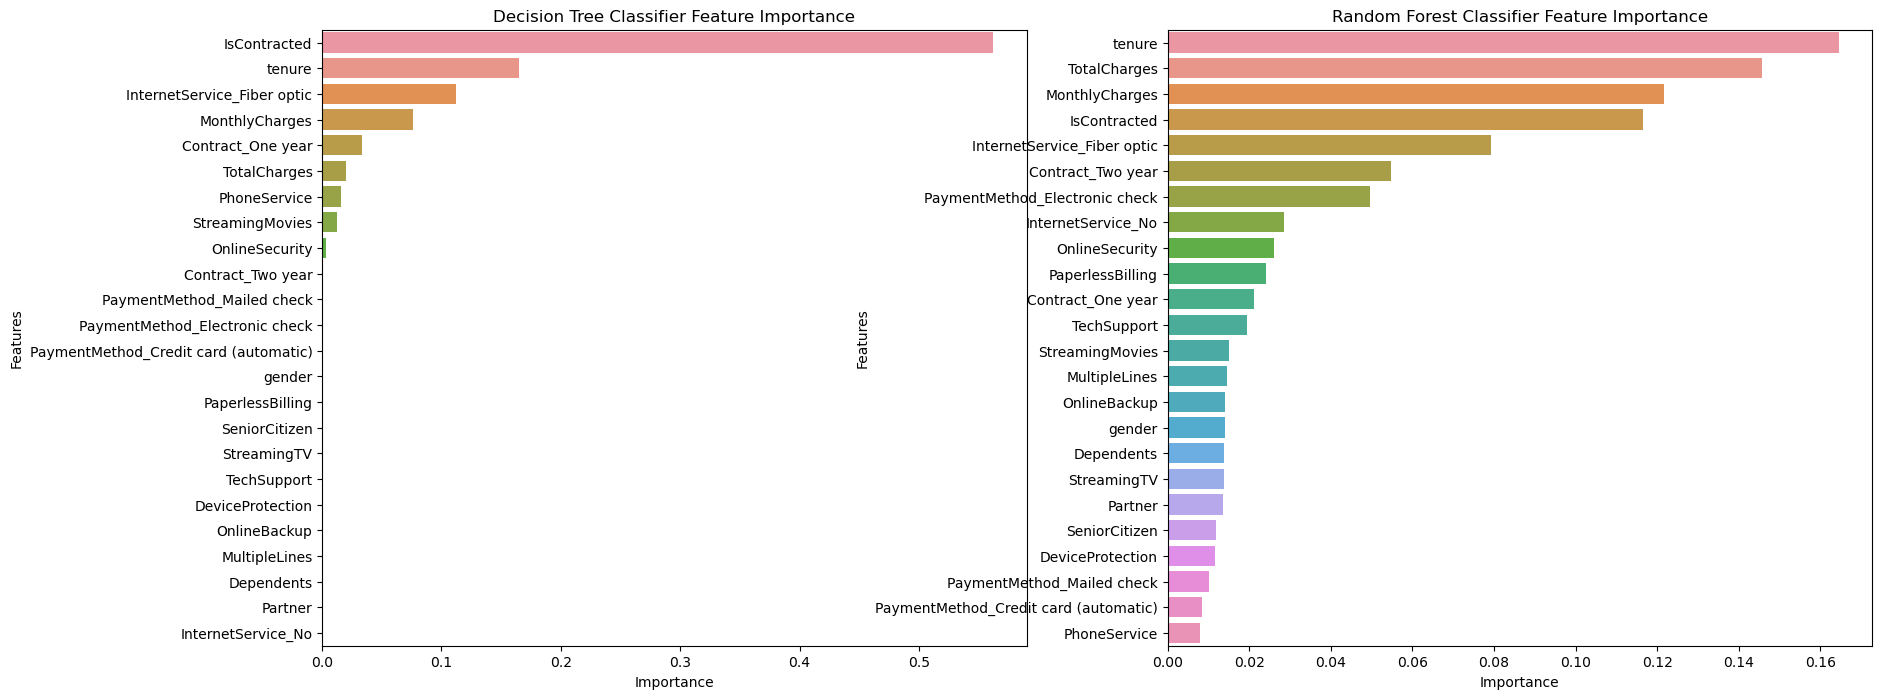

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
# Decision Tree Classifier Feature Importance
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': dtree.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax=ax[0]).set_title('Decision Tree Classifier Feature Importance')

# Random Forest Classifier Feature Importance
feature_df = pd.DataFrame({'Features': X_train.columns, 'Importance': rfc.feature_importances_})
feature_df.sort_values('Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax=ax[1]).set_title('Random Forest Classifier Feature Importance')


# Try different techniques to balance data

In [73]:
'''
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

def evaluate_model_performance(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

def fit_and_evaluate_classifier(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    evaluate_model_performance(model, X_test, y_test)

# Balancing Techniques: Up-sampling (SMOTE, ADASYN), Down-sampling, and SMOTEENN

# 1. Down-sampling
down_sampler = RandomUnderSampler(random_state=42)
X_train_down, y_train_down = down_sampler.fit_resample(X_train, y_train)

# 2. SMOTE (Up-sampling)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3. ADASYN (Up-sampling)
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

SMOTEENN (Combination of SMOTE and ENN)
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

# Model Initialization
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Decision Tree Evaluations
print("\n--- Decision Tree with Down-sampling ---")
fit_and_evaluate_classifier(decision_tree, X_train_down, y_train_down, X_test, y_test)

print("\n--- Decision Tree with SMOTE ---")
fit_and_evaluate_classifier(decision_tree, X_train_smote, y_train_smote, X_test, y_test)

print("\n--- Decision Tree with ADASYN ---")
fit_and_evaluate_classifier(decision_tree, X_train_adasyn, y_train_adasyn, X_test, y_test)

print("\n--- Decision Tree with SMOTEENN ---")
fit_and_evaluate_classifier(decision_tree, X_train_smoteenn, y_train_smoteenn, X_test, y_test)

# Random Forest Evaluations
print("\n--- Random Forest with Down-sampling ---")
fit_and_evaluate_classifier(random_forest, X_train_down, y_train_down, X_test, y_test)

print("\n--- Random Forest with SMOTE ---")
fit_and_evaluate_classifier(random_forest, X_train_smote, y_train_smote, X_test, y_test)

print("\n--- Random Forest with ADASYN ---")
fit_and_evaluate_classifier(random_forest, X_train_adasyn, y_train_adasyn, X_test, y_test)

print("\n--- Random Forest with SMOTEENN ---")
fit_and_evaluate_classifier(random_forest, X_train_smoteenn, y_train_smoteenn, X_test, y_test)

# Gradient Boosting Evaluations
print("\n--- Gradient Boosting with Down-sampling ---")
fit_and_evaluate_classifier(gradient_boosting, X_train_down, y_train_down, X_test, y_test)

print("\n--- Gradient Boosting with SMOTE ---")
fit_and_evaluate_classifier(gradient_boosting, X_train_smote, y_train_smote, X_test, y_test)

print("\n--- Gradient Boosting with ADASYN ---")
fit_and_evaluate_classifier(gradient_boosting, X_train_adasyn, y_train_adasyn, X_test, y_test)

print("\n--- Gradient Boosting with SMOTEENN ---")
fit_and_evaluate_classifier(gradient_boosting, X_train_smoteenn, y_train_smoteenn, X_test, y_test)


'''


'\nfrom sklearn.ensemble import GradientBoostingClassifier\nfrom imblearn.over_sampling import SMOTE, ADASYN\nfrom imblearn.under_sampling import RandomUnderSampler\nfrom imblearn.combine import SMOTEENN\n\ndef evaluate_model_performance(model, X_test, y_test):\n    y_pred = model.predict(X_test)\n    print(classification_report(y_test, y_pred))\n\ndef fit_and_evaluate_classifier(model, X_train, y_train, X_test, y_test):\n    model.fit(X_train, y_train)\n    evaluate_model_performance(model, X_test, y_test)\n\n# Balancing Techniques: Up-sampling (SMOTE, ADASYN), Down-sampling, and SMOTEENN\n\n# 1. Down-sampling\ndown_sampler = RandomUnderSampler(random_state=42)\nX_train_down, y_train_down = down_sampler.fit_resample(X_train, y_train)\n\n# 2. SMOTE (Up-sampling)\nsmote = SMOTE(random_state=42)\nX_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)\n\n# 3. ADASYN (Up-sampling)\nadasyn = ADASYN(random_state=42)\nX_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, 

# Balancing Data Using SMOTEENN

In [74]:
from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_train_smoteenn, y_train_smoteenn = smoteenn.fit_resample(X_train, y_train)

# Gradient Boosting & Random Forest with RandomizedSearchCV

In [75]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold

#Hyperparameter Tuning with RandomizedSearchCV for Gradient Boosting 

param_grid_gb = {
    'n_estimators': [100, 150, 200, 250, 300],
    'criterion': ['squared_error'],  
    'max_depth': [2, 4, 6, 8],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'loss': ['deviance', 'exponential']
}

random_search_gb = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42), 
    param_distributions=param_grid_gb, 
    n_iter=12, 
    cv=5, 
    verbose=1, 
    scoring='f1',  
    random_state=42
)

random_search_gb.fit(X_train_smoteenn, y_train_smoteenn)

print("Best Parameters found by RandomizedSearchCV for Gradient Boosting:", random_search_gb.best_params_)

gb_final_model = random_search_gb.best_estimator_

#Hyperparameter Tuning with RandomizedSearchCV for Random Forest 

param_grid_rf = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42), 
    param_distributions=param_grid_rf, 
    n_iter=12, 
    cv=5, 
    verbose=1, 
    scoring='f1', 
    random_state=42
)

random_search_rf.fit(X_train_smoteenn, y_train_smoteenn)

print("Best Parameters found by RandomizedSearchCV for Random Forest:", random_search_rf.best_params_)

rf_final_model = random_search_rf.best_estimator_

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validate Gradient Boosting model
cv_scores_gb = cross_val_score(gb_final_model, X_train_smoteenn, y_train_smoteenn, cv=kf, scoring='f1')
print("\nCross-Validation F1 Scores for Gradient Boosting:", cv_scores_gb)
print("Mean F1 Score from Cross-Validation (Gradient Boosting):", cv_scores_gb.mean())

# Cross-validate Random Forest model
cv_scores_rf = cross_val_score(rf_final_model, X_train_smoteenn, y_train_smoteenn, cv=kf, scoring='f1')
print("\nCross-Validation F1 Scores for Random Forest:", cv_scores_rf)
print("Mean F1 Score from Cross-Validation (Random Forest):", cv_scores_rf.mean())

# --- Final Evaluation on the Test Set ---

# Gradient Boosting evaluation on the test set
print("\n--- Gradient Boosting Model Classification Report ---")
y_pred_gb = gb_final_model.predict(X_test)
print(classification_report(y_test, y_pred_gb))

# Random Forest evaluation on the test set
print("\n--- Random Forest Model Classification Report ---")
y_pred_rf = rf_final_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters found by RandomizedSearchCV for Gradient Boosting: {'n_estimators': 300, 'max_depth': 6, 'loss': 'deviance', 'learning_rate': 0.1, 'criterion': 'squared_error'}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters found by RandomizedSearchCV for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}

Cross-Validation F1 Scores for Gradient Boosting: [0.94912427 0.95493934 0.95813205 0.94977974 0.96590909]
Mean F1 Score from Cross-Validation (Gradient Boosting): 0.9555768966653616

Cross-Validation F1 Scores for Random Forest: [0.955      0.96193772 0.96402878 0.95866315 0.96753247]
Mean F1 Score from Cross-Validation (Random Forest): 0.9614324218821247

--- Gradient Boosting Model Classification Report ---
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1036
       